<a href="https://ibb.co/VQ1S9tV"><img src="https://i.ibb.co/SdjnyPN/Image.jpg" alt="Image" border="0"></a>

#**PROJETO DE PREVISÃO DE TURNOVER**
#**PREDIÇÃO DE TURNOVER ATRAVES DE DADOS DOS FUNCIONARIOS**
#**TURNOVER FORECAST PROJECT**
#**TURNOVER PREDICTION THROUGH EMPLOYEES' DATA**
---
## Sobre os dados
## About Dataset
Uncover the factors that lead to employee turnover and explore important questions.

Demostrar os fatores que levam a demissão do colaborador e explorar perguntas importantes 

O objetivo deste projeto é analisar estatisticamente quais são as possíveis razões do desligamento espontâneo e criar um algoritmo para detectar quais profissionais podem rotacionar. Com tais informações uma empresa tem a possibilidade de entender as razões dos índices de desligamento, sendo possível então criar ações para prevenir os casos por ela indesejados. 

Este projeto será divido em duas partes, sendo esta primeira referente a análise exploratórias dos dados, na qual será levantada hipóteses que serão testadas estatisticamente. A segunda parte será a criação do modelo de machine learning para prever os colaboradores com rotatividade positiva. A análise será feita na linguagem python. 

Os dados foram obtidos atraves de conjunto de dados da internet.

### Importing libraries
### Importando bibliotecas

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from tkinter import *
from tkinter import ttk
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
pd.set_option('display.max_columns', None)


### Reading the data
### Lendo dados

In [186]:
df = pd.read_excel('DADOS_PARA_TURNOVER.XLSX')
df2 = pd.read_excel('DADOS_PARA_TURNOVER.XLSX')

df

,ID,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,1,saiu da empresa,58,Casado,1,Administrativo,Superior completo,BR10,SAO JOSE DOS CAMPOS,25,15,1745.2
1,2,saiu da empresa,27,Solt.,0,Administrativo,Superior incompleto,BR10,RECIFE,2,15,949.8
2,3,saiu da empresa,28,Solt.,0,Administrativo,Superior completo,BR12,BELO HORIZONTE,1,18,1371.2
3,4,ativo,28,Solt.,0,Administrativo,Superior completo,BR12,BELO HORIZONTE,1,18,1670.0
4,5,saiu da empresa,64,Casado,0,Administrativo,Superior incompleto,BR10,RIO DE JANEIRO,36,18,1667.0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,476,ativo,25,Solt.,0,Trainee,Superior completo,BR10,SOROCABA,0,17,1200.0
476,477,ativo,44,Casado,1,Trainee,Superior completo,BR10,MAUA,0,18,1600.0
477,478,ativo,30,Solt.,0,Trainee,Superior completo,BR12,OURO BRANCO,0,18,1728.0
478,479,ativo,30,Solt.,0,Trainee,Superior completo,BR14,BELO HORIZONTE,0,18,1600.0


In [187]:
df.head()

,ID,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,1,saiu da empresa,58,Casado,1,Administrativo,Superior completo,BR10,SAO JOSE DOS CAMPOS,25,15,1745.2
1,2,saiu da empresa,27,Solt.,0,Administrativo,Superior incompleto,BR10,RECIFE,2,15,949.8
2,3,saiu da empresa,28,Solt.,0,Administrativo,Superior completo,BR12,BELO HORIZONTE,1,18,1371.2
3,4,ativo,28,Solt.,0,Administrativo,Superior completo,BR12,BELO HORIZONTE,1,18,1670.0
4,5,saiu da empresa,64,Casado,0,Administrativo,Superior incompleto,BR10,RIO DE JANEIRO,36,18,1667.0


## Initial analisys of the data removing useless columns
## Analise de valores iniciais e possivel retirada de colunas avaliadas como irrelevantes

In [188]:
df["Grau de instrução"].unique()

array(['Superior completo', 'Superior incompleto', 'Colegial completo',
       'Pós grad.completo', 'Mestrado completo', 'Mestrado incompleto',
       'Colegial incompleto', 'Ginasial incompleto',
       'Pós grad.incompleto', 'Ginasial completo'], dtype=object)

### Variables and their types
### Averiguando tipos de variaveis

In [189]:
df.dtypes

ID                      int64
Status da ocupação     object
Idade do empregado      int64
Estado Civil           object
Núm.filhos              int64
Grupo Empregado        object
Grau de instrução      object
Área de trabalho       object
Endereço               object
Tempo de empresa        int64
Faixa Salarial         object
Salário Mensal        float64
dtype: object

### Removing useless columns from the data after visualization and analysis.
### Removendo colunas inuteis dos dados após analise e visualização dos dados.

In [190]:
# removendo colunas inuteis
df.drop(
        'ID',
    axis=1,
    inplace=True
)

### Moving target variable to the first column
### Movendo a variavel alvo para a primeira coluna

In [191]:
# attrition na primeira coluna
df.insert(0, 'Status da ocupação', df.pop('Status da ocupação'))
df.head()

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,saiu da empresa,58,Casado,1,Administrativo,Superior completo,BR10,SAO JOSE DOS CAMPOS,25,15,1745.2
1,saiu da empresa,27,Solt.,0,Administrativo,Superior incompleto,BR10,RECIFE,2,15,949.8
2,saiu da empresa,28,Solt.,0,Administrativo,Superior completo,BR12,BELO HORIZONTE,1,18,1371.2
3,ativo,28,Solt.,0,Administrativo,Superior completo,BR12,BELO HORIZONTE,1,18,1670.0
4,saiu da empresa,64,Casado,0,Administrativo,Superior incompleto,BR10,RIO DE JANEIRO,36,18,1667.0


### Transforming categorical data in numbers to fit the model
### Tranformando variaveis categoricas para treinar modelo

In [192]:
for col in df.columns:
  if df[col].dtype == object:
      df[col] = LabelEncoder().fit_transform(df[col])
df.head() # AQUI MUDA TUDO O QUE FOR OBJETO

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
0,1,58,0,1,0,8,0,74,25,2,1745.2
1,1,27,3,0,0,9,0,61,2,2,949.8
2,1,28,3,0,0,8,2,7,1,5,1371.2
3,0,28,3,0,0,8,2,7,1,5,1670.0
4,1,64,0,0,0,9,0,63,36,5,1667.0


### Showing statitics values for the data
### Mostrando estatiticas para os dados

In [193]:
df.describe()

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.404167,39.589583,1.087500,0.752083,3.329167,7.112500,1.468750,41.395833,7.283333,7.322917,2260.413750
std,0.491242,9.248162,1.434968,0.906366,1.699805,1.797659,1.122489,27.039166,8.851532,2.926000,1304.907122
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.800000
25%,0.000000,33.000000,0.000000,0.000000,3.000000,6.000000,0.000000,16.000000,1.000000,6.000000,1645.750000
50%,0.000000,40.000000,0.000000,0.000000,3.000000,8.000000,2.000000,50.000000,3.000000,8.000000,2200.000000
75%,1.000000,45.000000,3.000000,2.000000,4.000000,8.000000,2.000000,61.000000,12.000000,9.000000,2800.000000
max,1.000000,72.000000,5.000000,3.000000,8.000000,9.000000,3.000000,98.000000,46.000000,16.000000,11200.200000


### Creating data report for a better analysis
### Criando relatorio de dados para uma melhor analise

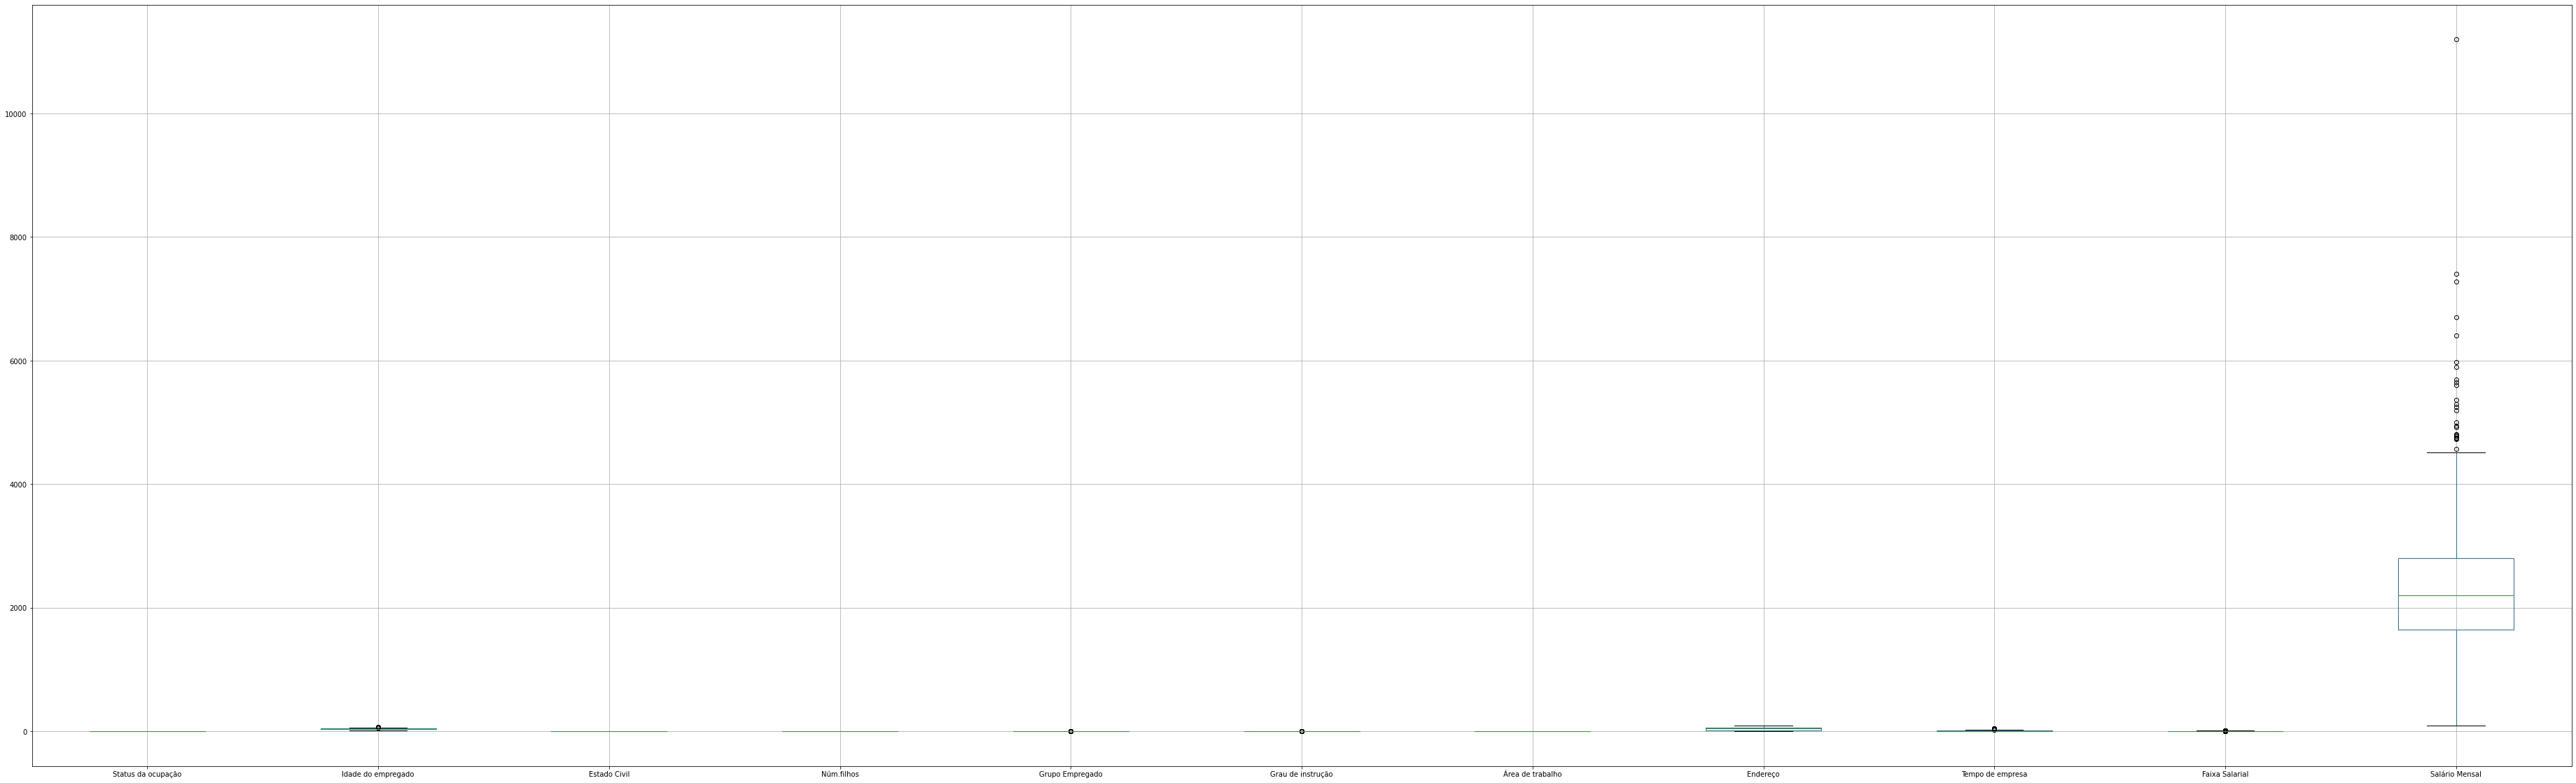

In [194]:
# plotar um boxplot para analisar presença de outliers no dataset
colunas = df.columns.to_list()
plt.figure(figsize=(65,20))
df.boxplot()
plt.show()

In [195]:
colunas

['Status da ocupação',
 'Idade do empregado',
 'Estado Civil',
 'Núm.filhos',
 'Grupo Empregado',
 'Grau de instrução',
 'Área de trabalho',
 'Endereço',
 'Tempo de empresa',
 'Faixa Salarial',
 'Salário Mensal']

### Correlation table of the variables
### Tabela de correlação da variaveis

In [196]:
df.corr()

,Status da ocupação,Idade do empregado,Estado Civil,Núm.filhos,Grupo Empregado,Grau de instrução,Área de trabalho,Endereço,Tempo de empresa,Faixa Salarial,Salário Mensal
Status da ocupação,1.000000,0.032912,0.124461,-0.285570,-0.187159,0.007506,-0.143633,0.110839,0.253040,-0.131657,-0.346836
Idade do empregado,0.032912,1.000000,-0.471275,0.408251,-0.000950,-0.269337,-0.041158,0.061379,0.545147,0.299543,0.529074
Estado Civil,0.124461,-0.471275,1.000000,-0.482492,0.048080,0.181508,-0.048847,0.024609,-0.216943,-0.219056,-0.437901
Núm.filhos,-0.285570,0.408251,-0.482492,1.000000,0.091021,-0.157104,0.093943,0.024628,0.198735,0.276644,0.433959
Grupo Empregado,-0.187159,-0.000950,0.048080,0.091021,1.000000,0.058910,0.010873,-0.035409,-0.054221,0.318162,0.334651
Grau de instrução,0.007506,-0.269337,0.181508,-0.157104,0.058910,1.000000,0.001746,-0.027848,-0.217703,-0.100193,-0.301374
Área de trabalho,-0.143633,-0.041158,-0.048847,0.093943,0.010873,0.001746,1.000000,-0.136128,-0.128330,0.093021,0.123491
Endereço,0.110839,0.061379,0.024609,0.024628,-0.035409,-0.027848,-0.136128,1.000000,0.110719,-0.043258,-0.110630
Tempo de empresa,0.253040,0.545147,-0.216943,0.198735,-0.054221,-0.217703,-0.128330,0.110719,1.000000,0.090931,0.157588
Faixa Salarial,-0.131657,0.299543,-0.219056,0.276644,0.318162,-0.100193,0.093021,-0.043258,0.090931,1.000000,0.556392


### Creating a better visual experience to show the correlations
### Criando uma melhor visualização para analisar as correlações

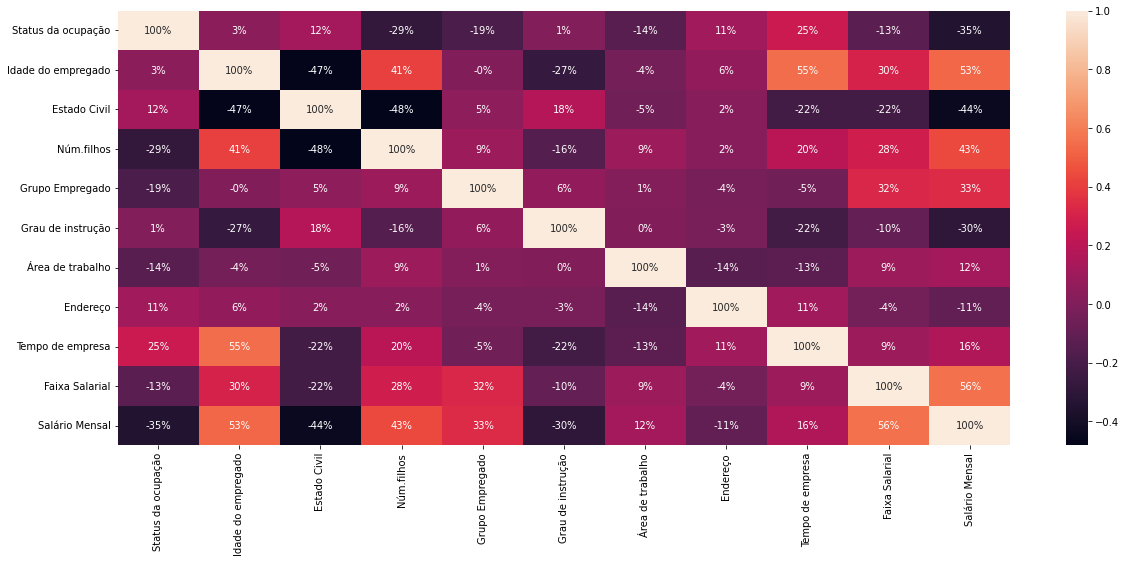

In [197]:
plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

#### it's possible to see that overtime has the strongest correlation with the target variable attrition.
#### É possivel analisar que  a variavel Overtime apresenta o maior nivel de correlação com a variavel alvo attrition.

### Nao mostra nada

<AxesSubplot:xlabel='Status da ocupação', ylabel='Idade do empregado'>

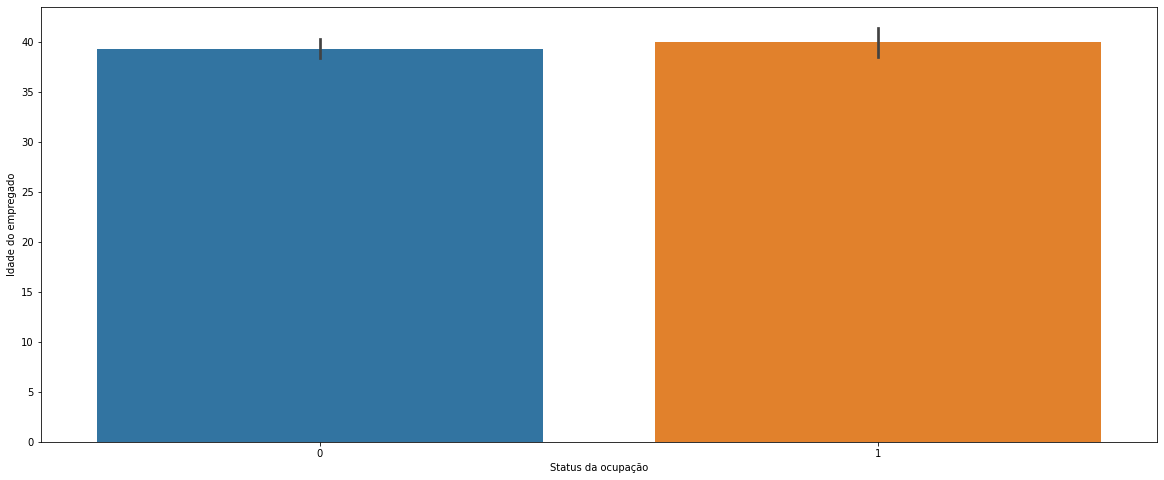

In [198]:
plt.subplots(figsize=(20,8))
sns.barplot(x='Status da ocupação', y='Idade do empregado', data=df)

<AxesSubplot:xlabel='Status da ocupação', ylabel='Idade do empregado'>

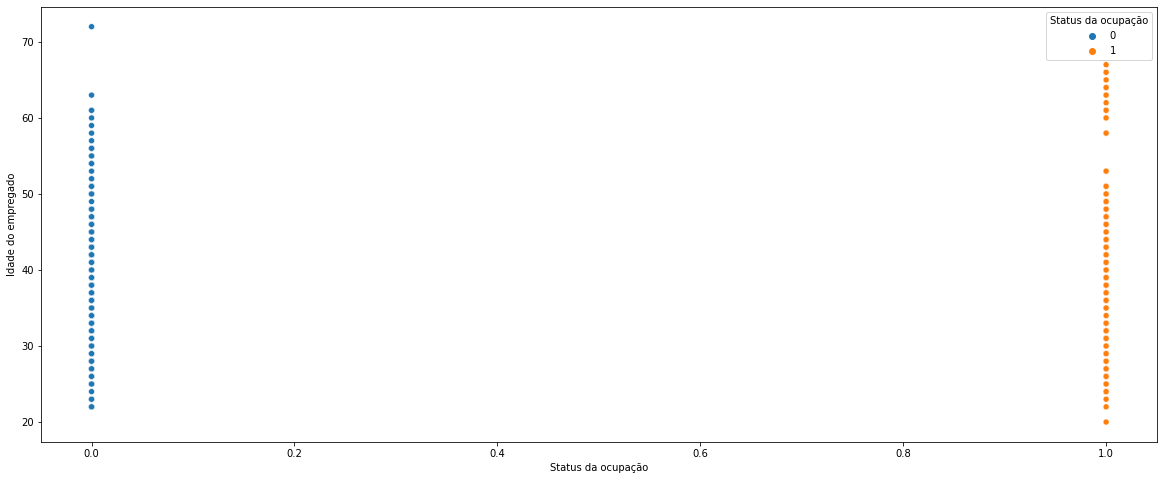

In [199]:
plt.subplots(figsize=(20,8))
sns.scatterplot(data=df, y="Idade do empregado", x="Status da ocupação", hue ='Status da ocupação')

<AxesSubplot:xlabel='Status da ocupação', ylabel='Idade do empregado'>

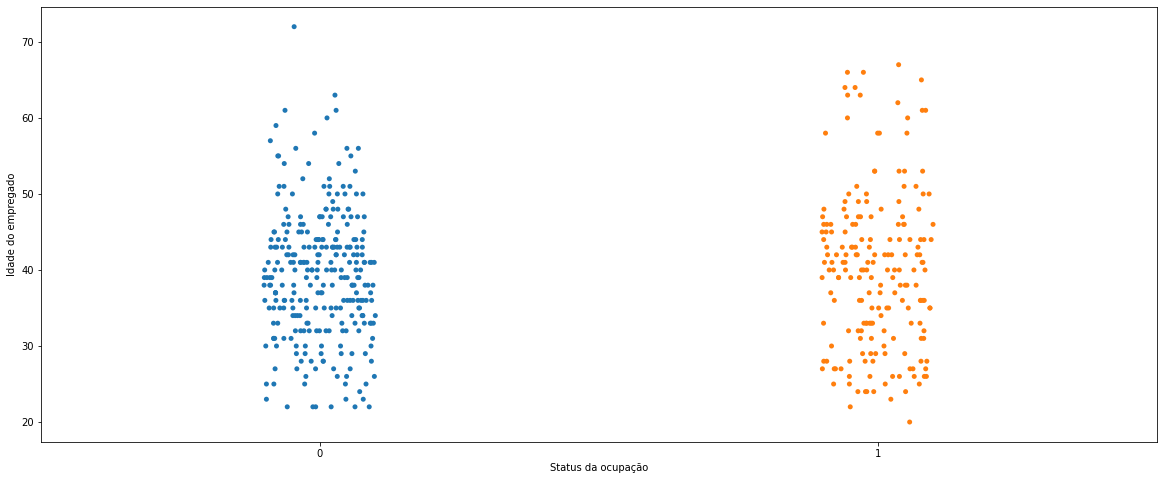

In [200]:
plt.subplots(figsize=(20,8))
sns.stripplot(x='Status da ocupação', y='Idade do empregado', data=df)

C:\Users\mvmen\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Status da ocupação', ylabel='Idade do empregado'>

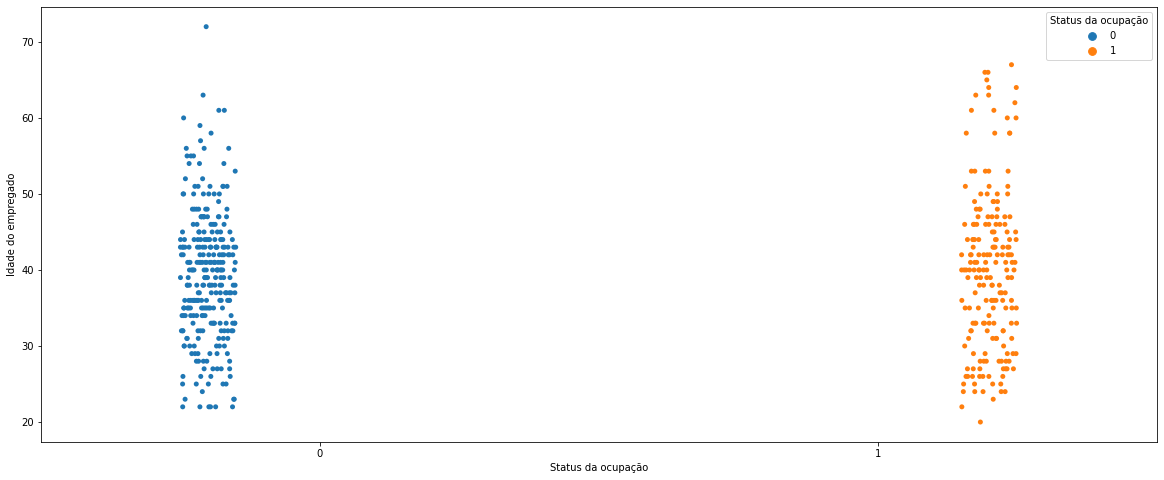

In [201]:
plt.subplots(figsize=(20,8))
sns.stripplot(x='Status da ocupação', y='Idade do empregado', data=df, hue='Status da ocupação', split=True)

### We can see the age that we have more attrition, about 25 to 35 years old
### Podemos aqui aferir qual a faixa de idade onde temos mais atrito de 25 a 35 anos.

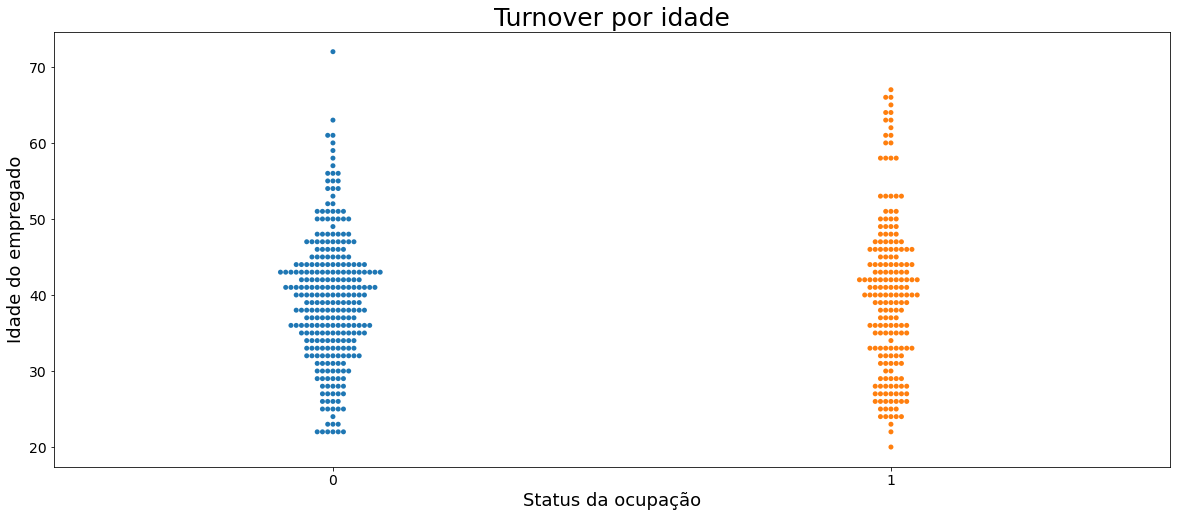

In [202]:
plt.subplots(figsize=(20,8))
sns.swarmplot(x='Status da ocupação', y='Idade do empregado', data=df)
plt.xlabel('Status da ocupação', fontsize=18);
plt.ylabel('Idade do empregado', fontsize=18);
plt.title('Turnover por idade', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

### the graphic below show that maybe linear regresson is not a godd model to train
### O grafico demostra que a regressão linear não e um modelo valido

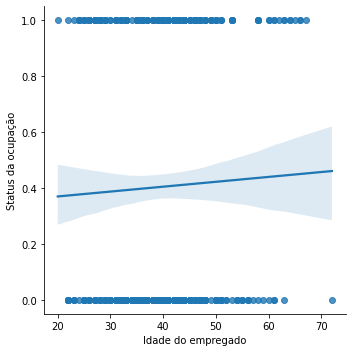

In [203]:
sns.lmplot(x ='Idade do empregado', y ='Status da ocupação', data = df) #lmplot o grafico mostra que talvez nao seja boa um regressao linear

### Showing the data between age and attrition, we have here a more explicit look of the data in all the ages
### Mostrando os dados entre a idade e atrito , nos temos uma visão mais explicita dos dados em todas as idades.

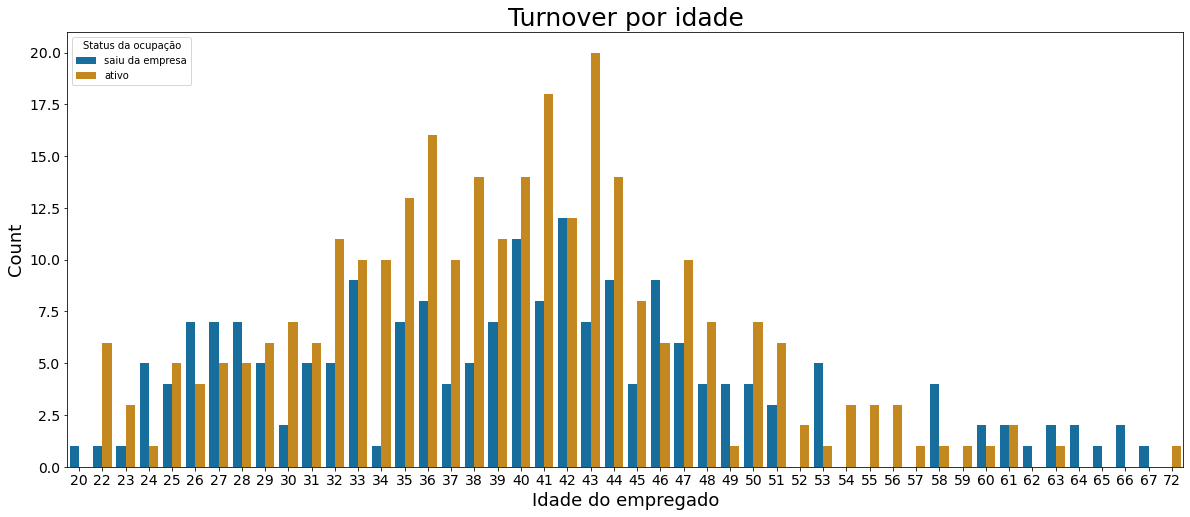

In [204]:
# Mostra attrition por idade

plt.subplots(figsize=(20,8))
sns.countplot(x="Idade do empregado", hue="Status da ocupação", data=df2, palette='colorblind')
plt.xlabel('Idade do empregado', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Turnover por idade', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
#Faixa etaria com maior nivel de turnover 37-48

In [205]:
#plt.subplots(figsize=(20,8))
#sns.countplot(x="Sexo - Texto", hue="Status da ocupação", data=df2, palette='colorblind')
#plt.show()
#dados enviesados numero de homens muito superior a mulheres, pode treinar o algoritmo de forma errada

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


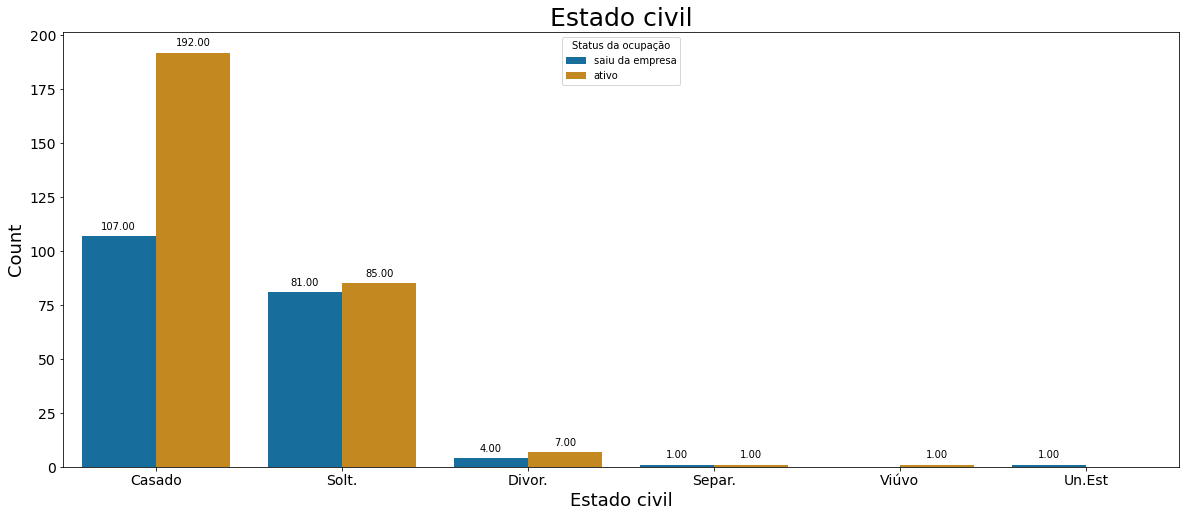

In [206]:
plt.subplots(figsize=(20,8))
ax = sns.countplot(x="Estado Civil", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Estado Civil'].value_counts().index)
plt.xlabel('Estado civil', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Estado civil', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax
plt.show()
#Solteiros ou divorciados possuem maior tendencia de sair do que ficar na empresa, um foco maior para divorciados

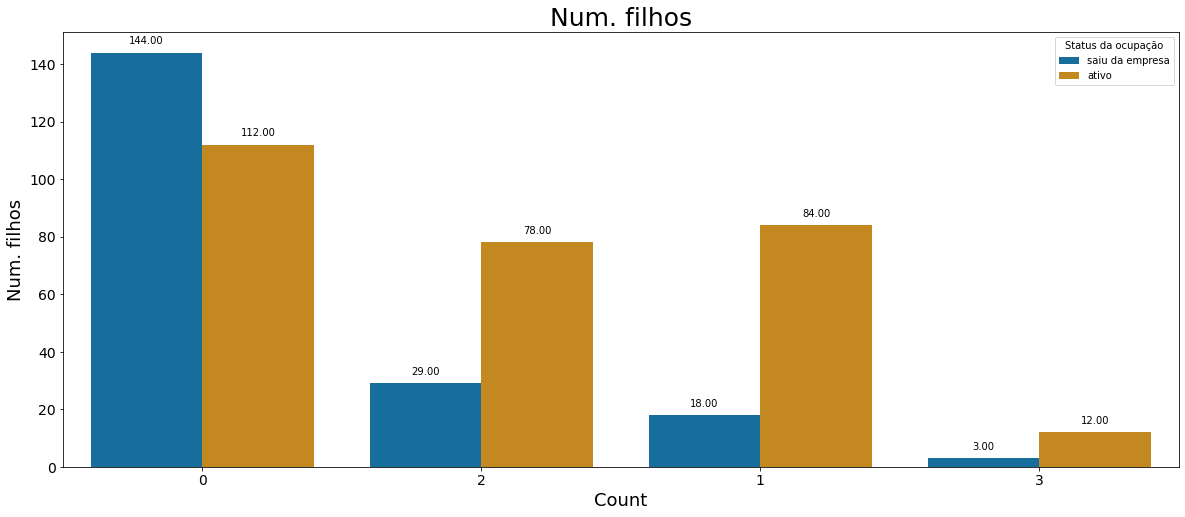

In [207]:
plt.subplots(figsize=(20,8))
ax = sns.countplot(x="Núm.filhos", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Núm.filhos'].value_counts().index)
plt.xlabel('Count', fontsize=18);
plt.ylabel('Num. filhos', fontsize=18);
plt.title('Num. filhos', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()
#Filhos e um numero muito relevante para a permanencia na empresa, bem amis do que considerava inicialmente

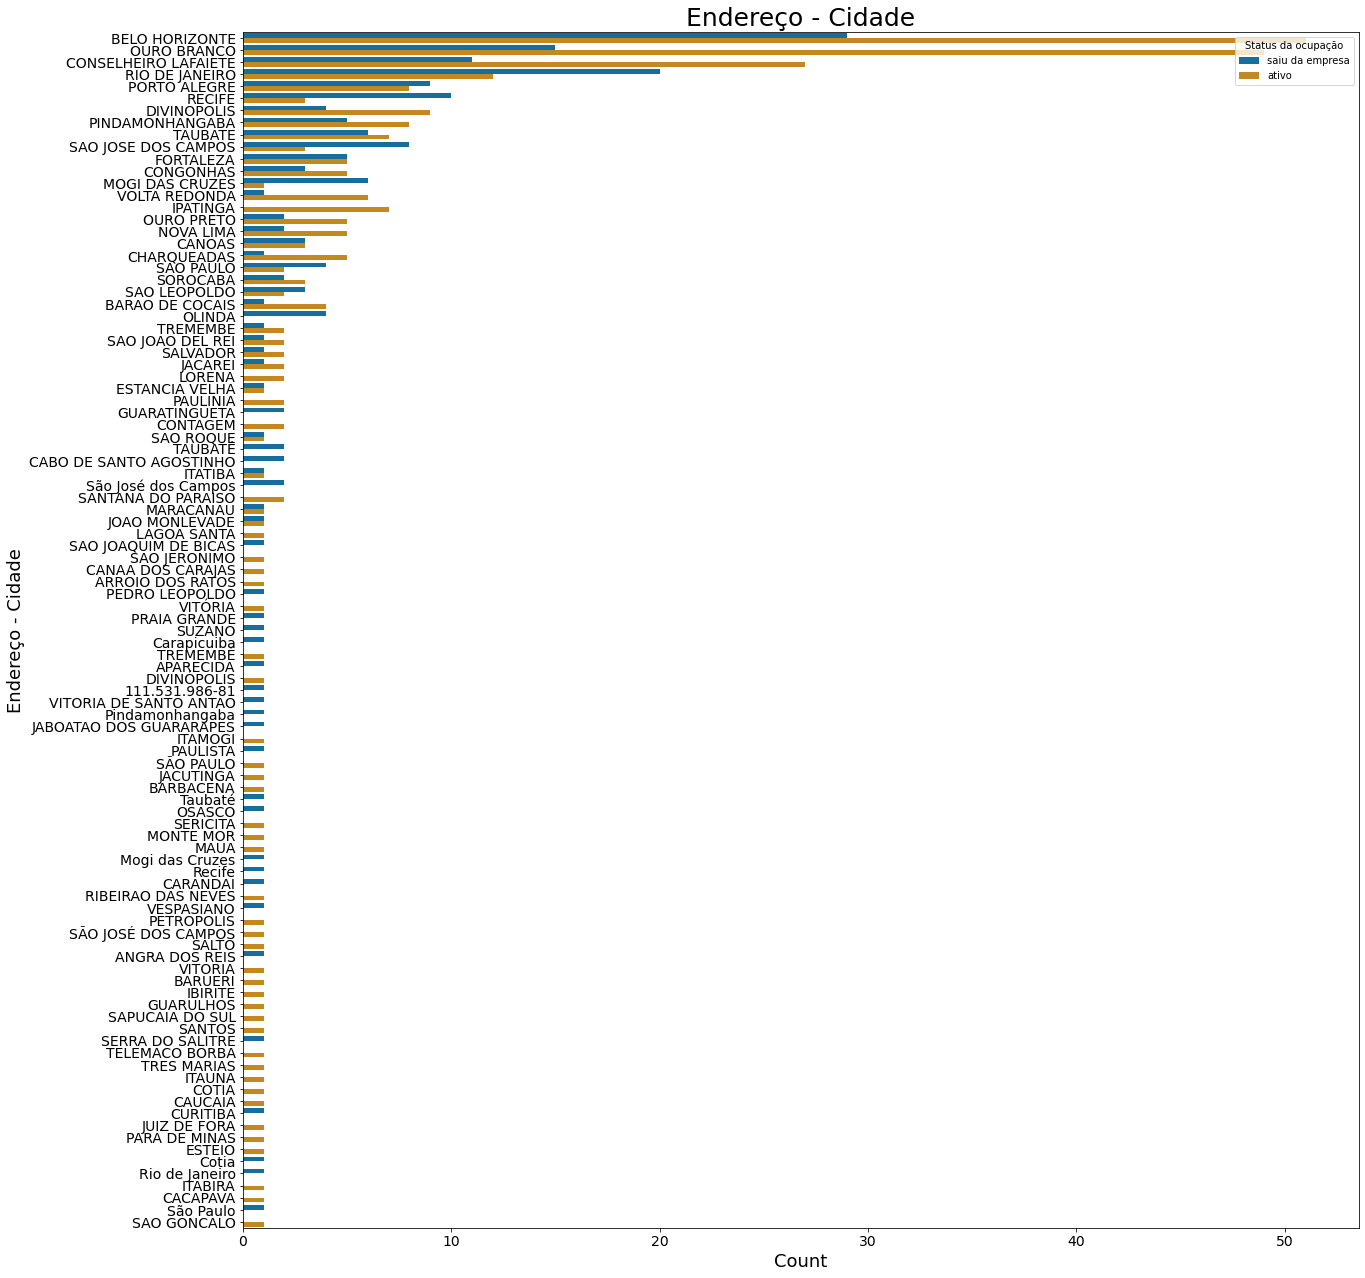

In [208]:
plt.subplots(figsize=(20,22))
sns.countplot(y="Endereço", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Endereço'].value_counts().index)
plt.xlabel('Count', fontsize=18);
plt.ylabel('Endereço - Cidade', fontsize=18);
plt.title('Endereço - Cidade', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()
#Grafico mostra que belo horizonte e rio sao as cidades com maior turnover avaliar peso no modelo para tirar ou nao, inicialmente manter
#Verificar se endereço atual e diferente do nascimento

posx and posy should be finite values
posx and posy should be finite values


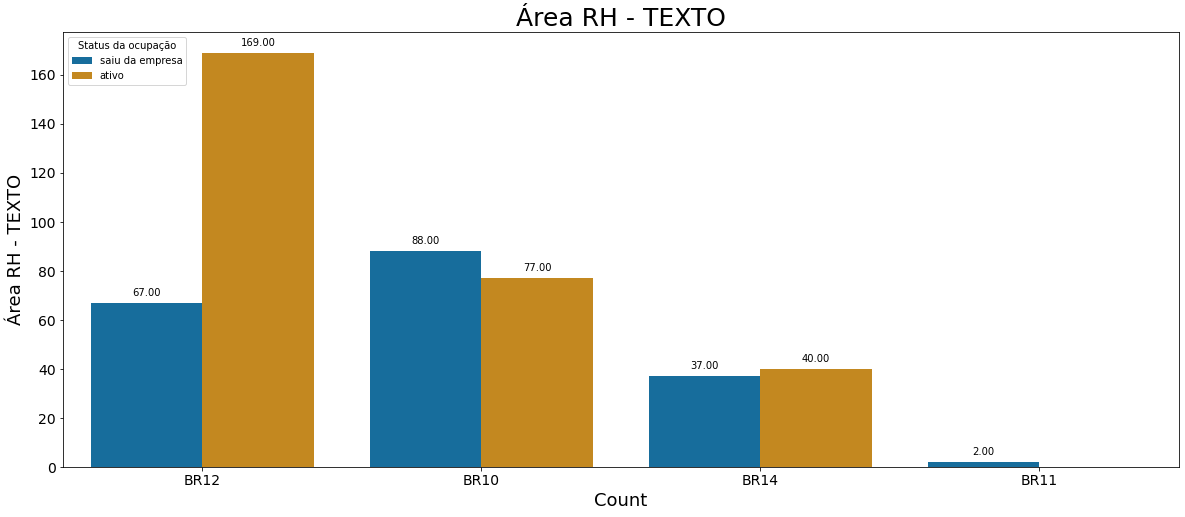

In [209]:
plt.subplots(figsize=(20,8))
ax = sns.countplot(x="Área de trabalho", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Área de trabalho'].value_counts().index)
plt.xlabel('Count', fontsize=18);
plt.ylabel('Área RH - TEXTO', fontsize=18);
plt.title('Área RH - TEXTO', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()
#talvez faça sentido porém me parece enviesado, checar depois de criar modelo

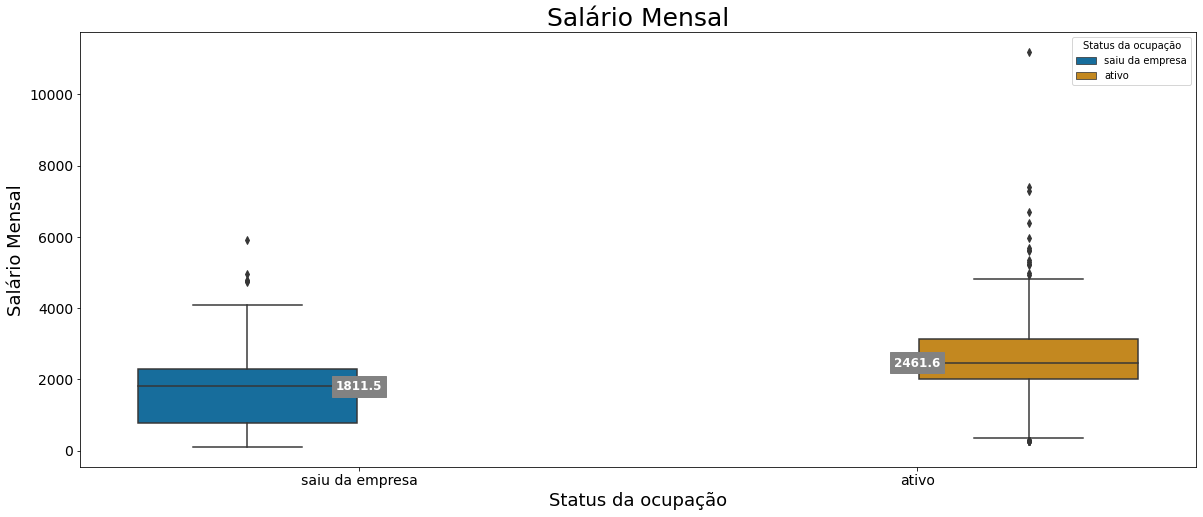

In [210]:
plt.subplots(figsize=(20,8))
ax = sns.boxplot(y="Salário Mensal",x = "Status da ocupação", hue="Status da ocupação", data=df2, palette='colorblind')
plt.xlabel('Status da ocupação', fontsize=18);
plt.ylabel('Salário Mensal', fontsize=18);
plt.title('Salário Mensal', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='semibold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#828282', edgecolor='#828282')
    )

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


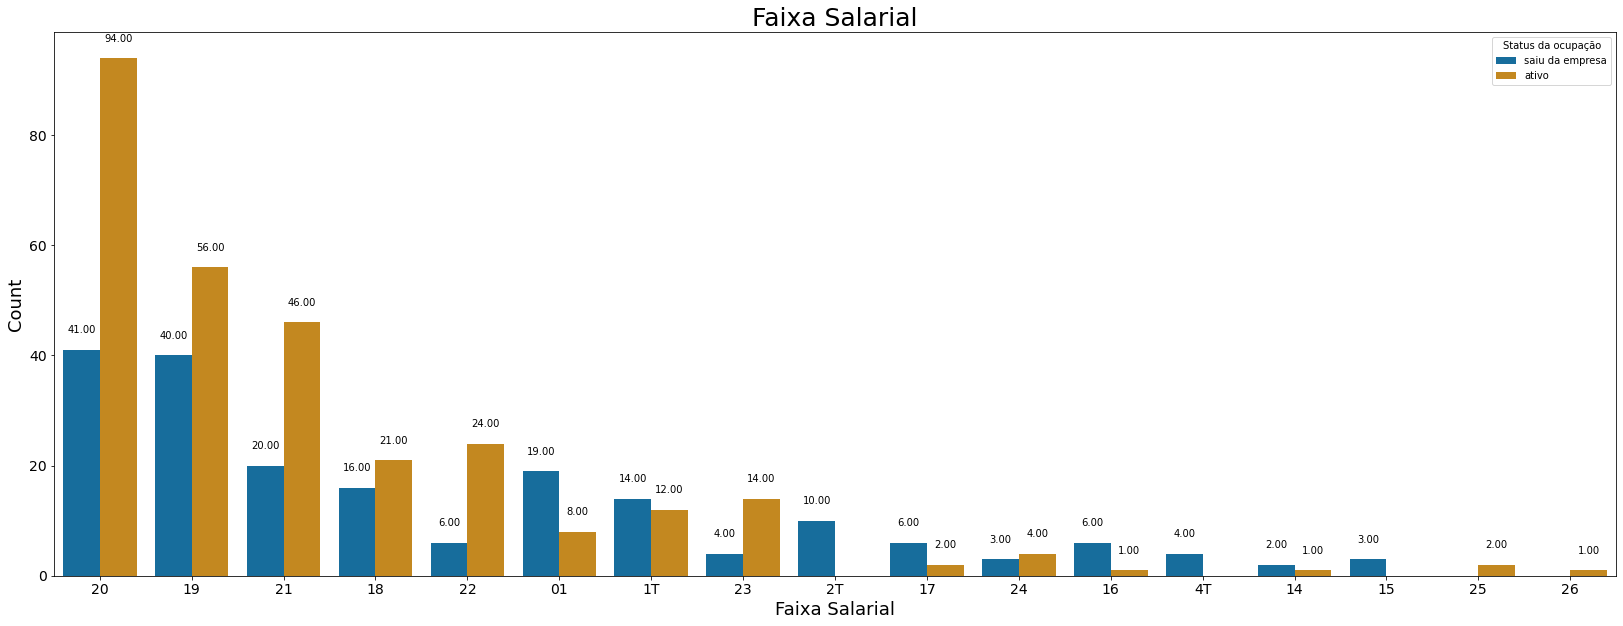

In [211]:

plt.subplots(figsize=(28,10))
ax = sns.countplot(x='Faixa Salarial', hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Faixa Salarial'].value_counts().index)
plt.xlabel('Faixa Salarial', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Faixa Salarial', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax
plt.show()
#A tendencia logiacamente acompanha a norma gerada pelos dados de renda mensal porem permite uma dvisão mais aprofundada dos dados enm questão 
#como por exemplo explicitar que a faixa 19 apresenta o ponto de maior atenção
#Quanto maior a faixa menor a chance de turnover

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


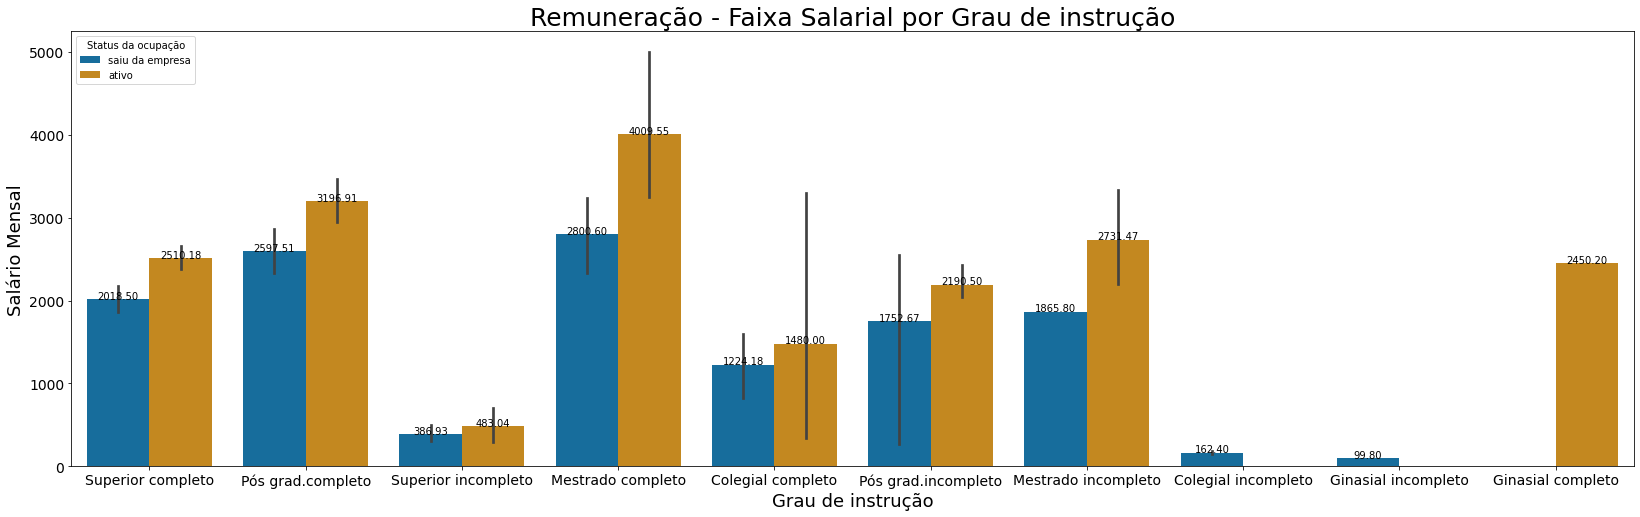

In [212]:
# Mostra renda por educação e sua relaçã com o atrito atrito
plt.subplots(figsize=(28,8))
ax = sns.barplot(x="Grau de instrução",y = "Salário Mensal", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Grau de instrução'].value_counts().index)
plt.xlabel('Grau de instrução', fontsize=18);
plt.ylabel('Salário Mensal', fontsize=18);
plt.title('Remuneração - Faixa Salarial por Grau de instrução', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')

ax
plt.show()

#Quanto maior o grau de intrução maior a chande turnover
#Ponto de atenção pos.grad incompleta com um valor de turnover maior do que a media em relação a renda, 
#Podendo indicar uma procura de melhores oportunidades ou falta de perspectiva de aumento de salario ou promoção no momento atual ,
#Podemos ainda indicar a procura por desenvolvimentos e treinamentos devido a fase da vida como fator de decisão
#A partir da pós percebemos um aumento no numero de turnovers

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


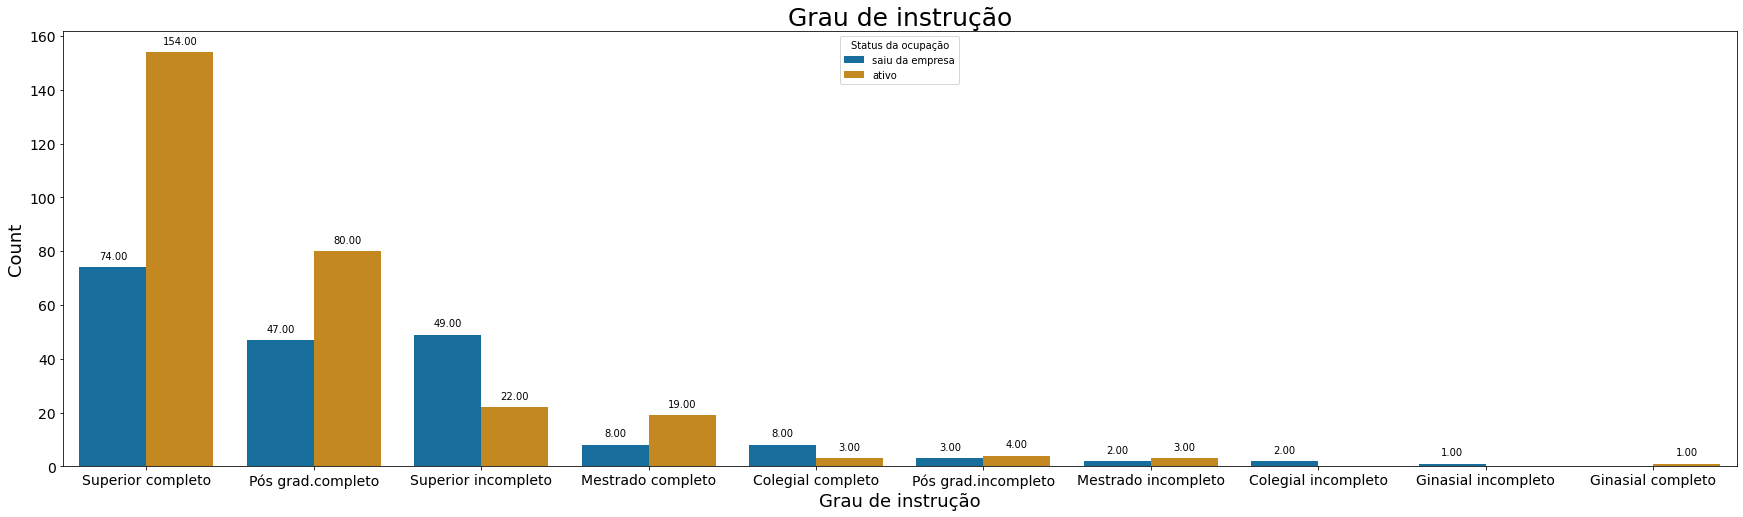

In [213]:
plt.subplots(figsize=(30,8))
ax = sns.countplot(x="Grau de instrução", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Grau de instrução'].value_counts().index)
plt.xlabel('Grau de instrução', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Grau de instrução', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()
#Proporcionalmente o numero de pessoas com pos grad completa é o maior, podendo indicar apos concluir os estudos uma busca maior de oportunidades ou a falta delas
# na empresa, um recem concluinte de estudos e um ponto de atenção para retenção
#Percebemos tambem que no geral quanto menor o grau de instrução maior a chance de turnover

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


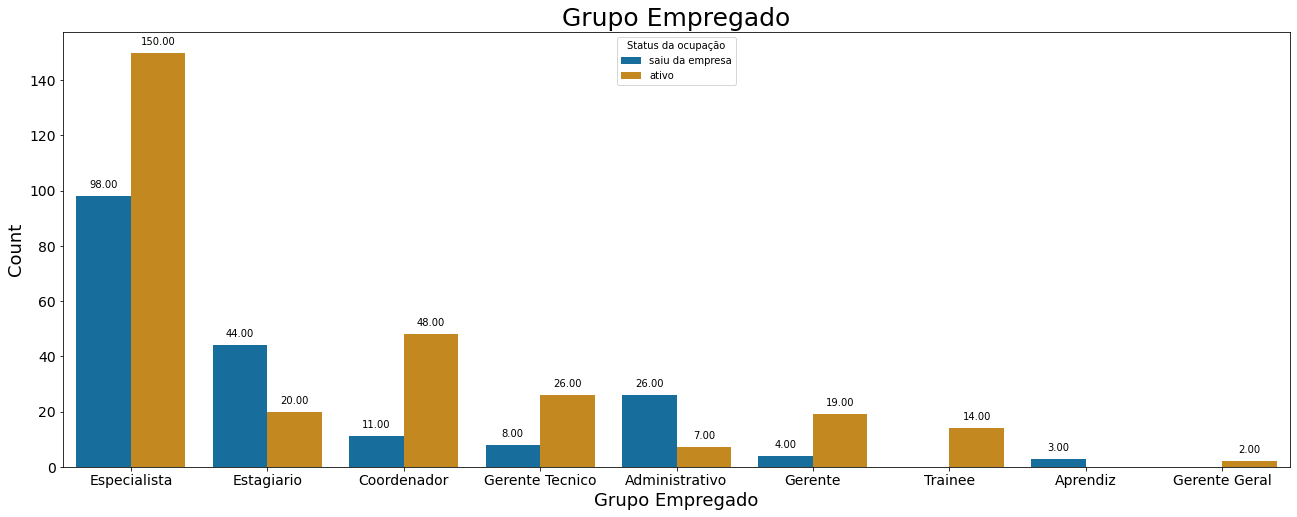

In [214]:
plt.subplots(figsize=(22,8))
ax = sns.countplot(x="Grupo Empregado", hue="Status da ocupação", data=df2, palette='colorblind',order = df2['Grupo Empregado'].value_counts().index)
plt.xlabel('Grupo Empregado', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Grupo Empregado', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
  height + 3,
  '{:1.2f}'.format((height)),
  ha='center')
ax
plt.show()

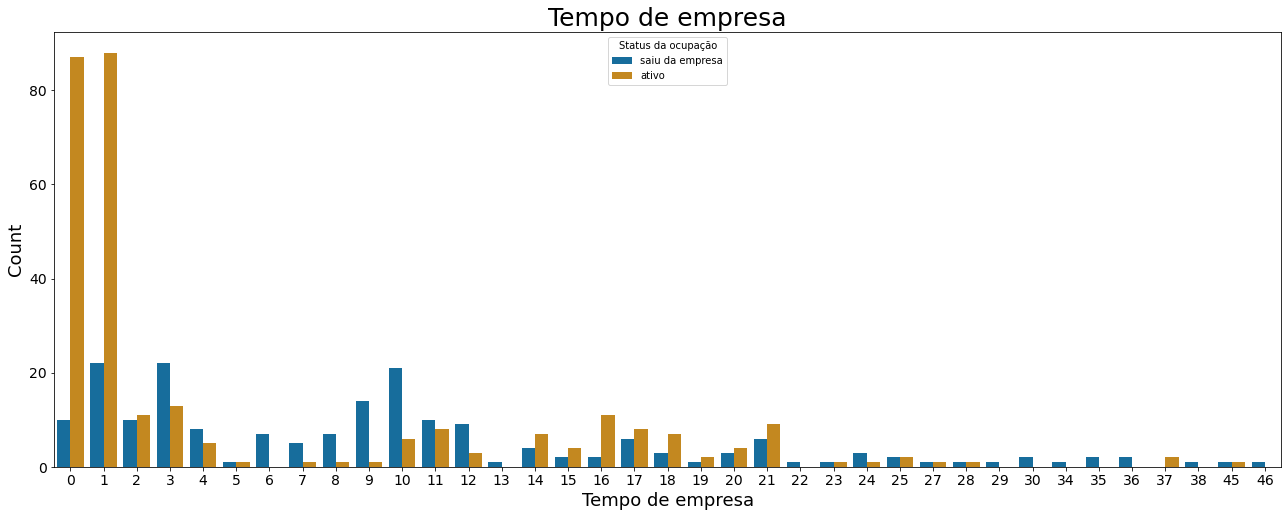

In [215]:
plt.subplots(figsize=(22,8))
sns.countplot(x="Tempo de empresa", hue="Status da ocupação", data=df2, palette='colorblind')
plt.xlabel('Tempo de empresa', fontsize=18);
plt.ylabel('Count', fontsize=18);
plt.title('Tempo de empresa', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

###Dividing data for training
### Dividindo os dados para treinar

In [216]:
df.shape

(480, 11)

In [217]:
# dividindo os dados
X = pd.DataFrame(df.iloc[:, 1:df.shape[1]].values, columns=df.columns.values[1:29])
#X = df.iloc[:, 1:df.shape[1]].values #valores de todas as colunas
Y = df.iloc[:, 0].values #attrition

In [218]:
#X2

In [219]:
X.shape

(480, 10)

In [220]:
Y.shape

(480,)

### Making a split for 30% test and 70% training
### Fazendo uma divisão de 30% para teste e 70 % para treino

In [221]:
# dividindo em 30% teste e 70% treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=37119815)
# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 336 amostras
Dados para Teste: 144 amostras


###  Making a Logistic Regression Model
### Fazendo um modelo de regressão logistica

In [222]:
#Usando regressao logistica
#pipe = (make_pipeline(StandardScaler(), )LogisticRegression())
pipe = (LogisticRegression())
pipe.fit(X_train, Y_train)  # aplicando a escala nos dados de treinamento
pipe.score(X_train, Y_train)  # aplicando escala nos dados de teste.

C:\Users\mvmen\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7827380952380952

### We get 72% of correct prediction
### Obtemos um modelo com 72% de acuracia

In [223]:
pipe.score(X_test, Y_test)

0.7222222222222222

### Checking wich of the variables are useless or important in the model
### Obtendo a importancia das variveis para avaliarmos quais são necessarias ou irrelevantes no modelo.

Feature: 0, Score: 0.06382
Feature: 1, Score: -0.00859
Feature: 2, Score: -0.22732
Feature: 3, Score: -0.18166
Feature: 4, Score: -0.11553
Feature: 5, Score: -0.04998
Feature: 6, Score: 0.00579
Feature: 7, Score: 0.09248
Feature: 8, Score: 0.13450
Feature: 9, Score: -0.00147


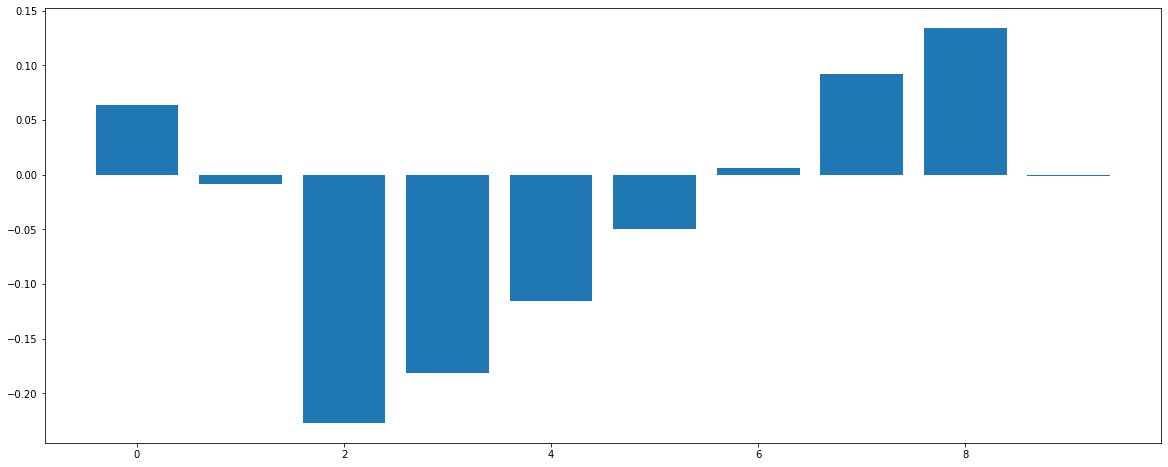

In [224]:
plt.subplots(figsize=(20,8))
# get importance
importance = pipe.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


### Using predict to vizualise model results
### Usando predict para visualizar os resultados do modelo

In [225]:
#Usando predict para visualizar os resultados do modelo
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, Y_train)
pipe_predict = pipe.predict(X_test) #Predictions on Testing data
print(pipe_predict)
y_pred = pipe_predict
print('\n\n',classification_report(Y_test, y_pred))

[0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1
 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1]


               precision    recall  f1-score   support

           0       0.77      0.82      0.79        84
           1       0.72      0.65      0.68        60

    accuracy                           0.75       144
   macro avg       0.74      0.74      0.74       144
weighted avg       0.75      0.75      0.75       144



### Trying to get a better resulta using the random forest classifier
### Tentado conseguir um resultado melhor utilizando o random forest classifier

In [226]:
# Usando o random forest classifier - O n_estimators está dois porque default está com overffiting modelo 
#random forest pode nao ser idela melhor conferir depois
forest = RandomForestClassifier(n_estimators = 2,criterion='entropy', random_state=37119815)
forest.fit(X_train, Y_train)
forest.score(X_train, Y_train)

0.875

### We get a 78% accuracy model
###Obtemos um modelo com 78% de acuracia 

In [227]:
forest.score(X_test, Y_test)

0.75

### Checking wich of the variables are useless or important in the model
### Obtendo a importancia das variveis para avaliarmos quais são necessarias ou irrelevantes no modelo.

In [228]:
forest.feature_importances_

array([0.07346941, 0.02417917, 0.10295757, 0.02720987, 0.05120863,
       0.06150364, 0.10210732, 0.24395346, 0.10712152, 0.2062894 ])

### Sorting and plotting the values
### Oraganizando e plotando os valores, vemos que varios dos valores não possuem importancia nenhuma e algumas apresentam alto valo rno modelo, podemos então selecionar a varivaeis que devem ser usadas no modelo para um a melhor acurarica e desempenho computacional


Text(0.5, 1.0, 'Importância de cada feature')

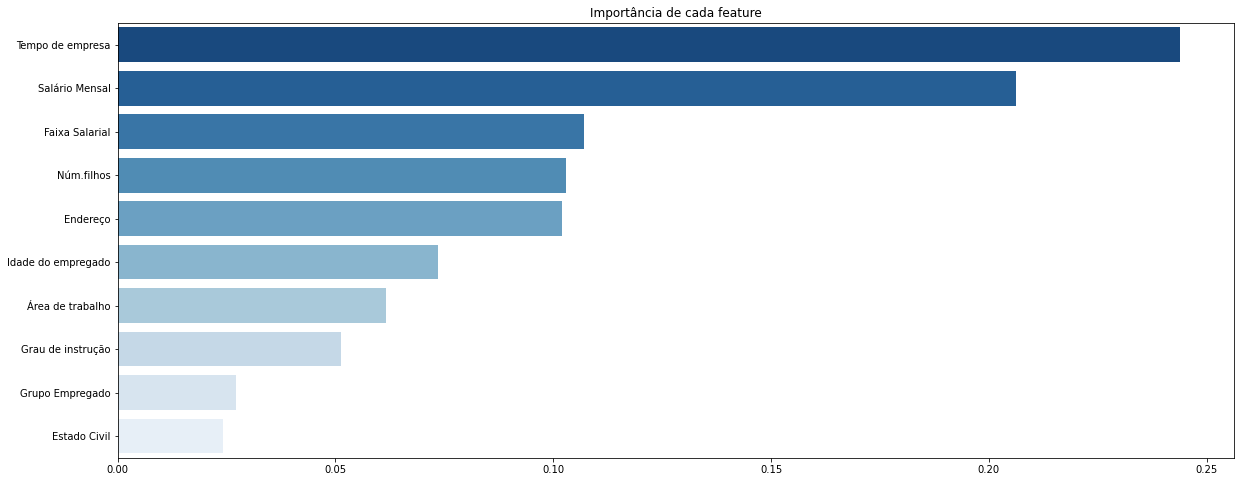

In [229]:
plt.subplots(figsize=(20,8))
importances = pd.Series(data = forest.feature_importances_, index=df.columns[1:31])
importances.sort_values(ascending = False, inplace = True)
sns.barplot(x=importances, y=importances.index, orient='h',  palette="Blues_r").set_title('Importância de cada feature')

In [230]:
Y_test

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [231]:
importances.sort_values(ascending = False)

Tempo de empresa      0.243953
Salário Mensal        0.206289
Faixa Salarial        0.107122
Núm.filhos            0.102958
Endereço              0.102107
Idade do empregado    0.073469
Área de trabalho      0.061504
Grau de instrução     0.051209
Grupo Empregado       0.027210
Estado Civil          0.024179
dtype: float64

### Using predict to vizualise model results
### Usando predict para visualizar os resultados do modelo

In [232]:
forest_predict = forest.predict(X_test) #Predictions on Testing data
y_pred = forest_predict
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81        84
           1       0.83      0.50      0.62        60

    accuracy                           0.75       144
   macro avg       0.78      0.71      0.72       144
weighted avg       0.77      0.75      0.73       144



In [233]:
### Getting model accuracy using test data
### Obtendo a acuaracia do modelo utilizando dados de teste

In [234]:
# Obtendo a acuracia do modelo com o random forest usando os dados de teste
cm = confusion_matrix(Y_test, forest.predict(X_test))

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
accuracy = (TP + TN) / (TN + TP + FN + FP)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy))

[[78  6]
 [30 30]]
Accuracy: 0.75%


#### Let's verivy if the linear regression really isn't a good idea
### O grafico anteriormente demostrava que a regressao linear nao e uma boa ideia vamos verificar.

In [235]:
reg = LinearRegression().fit(X_train, Y_train)
reg.score(X_train,Y_train)

0.299917312152879

In [236]:
#Comparando linear cnormalizada e nao normalizada
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, Y_train)  
pipe.score(X_train, Y_train)

0.299917312152879

In [237]:
pipe.score(X_test, Y_test)

0.24110936417928475

In [238]:
preds = pipe.predict(X_test)
r2_score(Y_test, preds) ## Usado somente para regressão linear, é o peso que uma variavel afeta a outra. quanto mais proximo d eum melhor.

0.24110936417928475

Testando XGBoost melhor ferramenta de machine learning com aprendizado de reforço para modelos que lidam com regressão logistica

In [239]:
clf = XGBClassifier(n_estimators = 500,
                    max_depth = 15, 
                    learning_rate = 0.1,
                    subsample = 0.5,
                    random_state=37119815, )

# Training the XGB classifier
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=37119815, reg_alpha=0, reg_lambda=1, ...)

In [240]:
# fazendo a predição com os dados de teste
y_pred = clf.predict(X_test)
# Cobinando os valores encontrados com os valores atuais
pd.DataFrame(data={'Rótulo Atual': Y_test, 'Rótulo Predito': y_pred}).head()

,Rótulo Atual,Rótulo Predito
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


C:\Users\mvmen\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


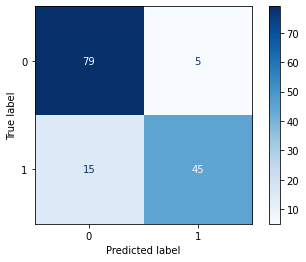

In [241]:
# apresentando os resultados pela Matriz de COnfusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test, cmap='Blues')

In [242]:
# Score da Acurácia
from sklearn.metrics import accuracy_score
print(f'Precisão do modelo: {round(accuracy_score(Y_test, y_pred)*100,3)}%')

Precisão do modelo: 86.111%


In [243]:
# Relatório da Classificação
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        84
           1       0.90      0.75      0.82        60

    accuracy                           0.86       144
   macro avg       0.87      0.85      0.85       144
weighted avg       0.87      0.86      0.86       144



#Treinando dados no algoritmo escolhido com varios parametros diferentes de entrada, para evitar vies e overfitting, obtendo assim uma porcetagem de predição mmais acurada e de acordo com a realidade de novos dados

In [244]:
# dividindo em 30% teste e 70% treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=37119815, stratify = Y)
# verificando a dimensão dos dados de treino e teste
print(f'Dados para Treino: {X_train.shape[0]} amostras')
print(f'Dados para Teste: {X_test.shape[0]} amostras')

Dados para Treino: 336 amostras
Dados para Teste: 144 amostras


#Dividindo os dados  de fomra aleatoria pelo metodo Kfold 

In [245]:
model = clf 

results = cross_val_score(model, X_train, Y_train, cv = KFold(n_splits = 10,shuffle = True), scoring = 'accuracy')

def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

Acurácia média: 80.95%
Intervalo de acurácia: [72.02% ~ 89.88%]


# Com dados estratificados para que tenham uma mesma proporção de casos positivos e negativos

In [246]:
results = cross_val_score(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'accuracy')
intervalo(results)

Acurácia média: 81.25%
Intervalo de acurácia: [69.13% ~ 93.36%]


##Analisando ao inves da acuracia a precisão ou seja dos resultados que foram positivos quantos realmente eram positivos, a acuracia mede quantos foram previstos corretamente desconsiderando outros resultados positivos errados.

In [247]:
results = cross_val_score(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'precision')

def intervalo2(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de precisão: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo2(results)

Precisão média: 80.25%
Intervalo de precisão: [64.37% ~ 96.13%]


##Analisando agora a medida recall, a recall de um modelo de Machine Learning é definido como a proporção de previsões corretas da categoria alvo, Verdadeiros Positivos em relação a soma dos verdadeiros positivos com os Falsos Negativos. Falsos negativos são os casos da categoria alvo que seu modelo previu como se fosse da categoria 0 e eram 1.

In [248]:
results = cross_val_score(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'recall')

def intervalo3(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de recall: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo3(results)

Recall médio: 72.86%
Intervalo de recall: [56.08% ~ 89.63%]


# Calculando valores para threshold de recall e precisão para valiar qual o ponto otimo, no caso do XGB o valor é 0.5 onde achamos valores proximos dos encontrados anteriormente com precisão de 93% e recall de 80%

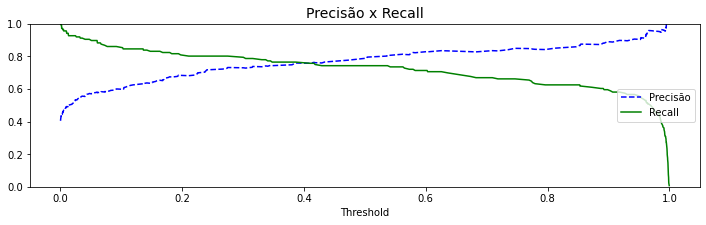

In [249]:
y_prob = cross_val_predict(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True),method = 'predict_proba')
y_scores= y_prob[:,1]

precisions, recalls, thresholds = precision_recall_curve(Y_train,y_scores)

fig, ax = plt.subplots(figsize = (12,3))
plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right')
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 14)
plt.show()

In [250]:
#Treshold padrão para o modelo 0.5 podemos alterar esse valor para vermos quando queremos mais precisão ou mais recall
# no nosso caso de turnover queremos maior recall, afinal quem quer pedir demissão ou sair precisam ser identificados 
#principalmente quando a intenção e reter key people
#Digamos que esse modelo seja implementado, por exemplo, e que ele prevê que 100 pessoas vao sair da empresa. 
#Dada a nossa precisão, em média,desses 100 pacientes, 6 vao continuar na empresa e nosso modelo errou ao classificá-los. 
#Agora de acordo com nosso recall, em média, de 100 pacientes com doenças cardíacas, 
#15 não terão o diagnóstico de estarem propensos a demissão
#Entao segundo o grafico o ponto de threshold que o recall e maior que o precision e maior que 0.3

In [251]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
Y_train_pred_recall_90 = (y_scores > 0.3)
print('Nova precisão: {:.4f}'
       .format(precision_score(Y_train,Y_train_pred_recall_90)))
print('Novo recall: {:.4f}'
       .format(recall_score(Y_train,Y_train_pred_recall_90)))

Nova precisão: 0.7297
Novo recall: 0.7941


In [252]:
#Com isso consiguimos um valor de recall 97% e uma precisão de 74% o que pode ser melhor par anosso modelo

In [253]:
# relatório do modelo ele mostra para os dados 1 que e o importante e 0 que tambem e bom, o valor f1-score é um valor da media harmonica
#entre os valore de precision e recall ou seja a media dos dois qunto maior ele melhor
y_pred = cross_val_predict(model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True))
print('Relatório de classificação:\n', classification_report(Y_train, y_pred, digits=4))


Relatório de classificação:
               precision    recall  f1-score   support

           0     0.8224    0.8800    0.8502       200
           1     0.8033    0.7206    0.7597       136

    accuracy                         0.8155       336
   macro avg     0.8129    0.8003    0.8050       336
weighted avg     0.8147    0.8155    0.8136       336



#Metodo mais utilizado e um do melhorers para avaliar um modelo de machine learning quanto mais proximo do ponto (0,0) e (1,0) ou seja quanto mais proximoda area superior a equerda melhor, outro metodo tambem utilizado e calcular a area de roc para comparar modelos quanto maior e mais proximo de 1.0 melhor. A curva ROC em um modelo serve para avaliar se o modelo prevê corretamente o maior número possível de casos da variável alvo, mas cometendo o menor número de erros possíveis de falsos positivos. Então um modelo bom é aquele que define um score que maximiza a TPR ao mesmo tempo que minimiza a FPR.

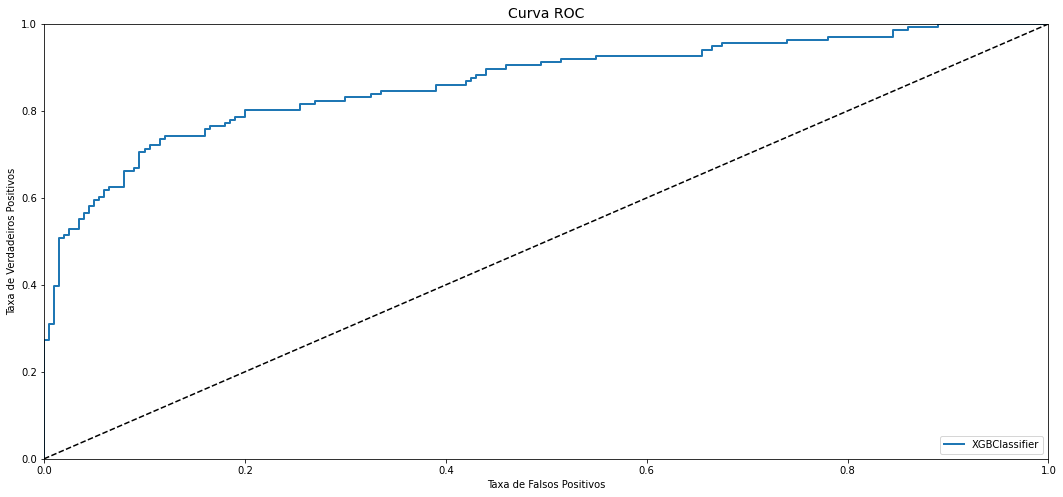

In [254]:
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
fig, ax = plt.subplots(figsize = (18,8))
plt.plot(fpr, tpr, linewidth=2, label = 'XGBClassifier')
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc = 'lower right')
plt.title('Curva ROC', fontsize = 14)
plt.show()


In [255]:
from sklearn.metrics import roc_auc_score
print('Área sob a curva ROC: {:.4f}'
      .format(roc_auc_score(Y_train, y_scores)))

Área sob a curva ROC: 0.8653


In [256]:
final_model = clf
final_model.fit(X_train, Y_train)
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)
# imprimir relatório de classificação
print("Relatório de Classificação:\n", 
       classification_report(Y_test, y_pred, digits=4))
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(Y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8427    0.8721    0.8571        86
           1     0.8000    0.7586    0.7788        58

    accuracy                         0.8264       144
   macro avg     0.8213    0.8154    0.8180       144
weighted avg     0.8255    0.8264    0.8256       144

AUC: 0.8641



In [257]:
y_prob = cross_val_predict(model, X_test, Y_test, cv = StratifiedKFold(n_splits = 10, shuffle = True),method = 'predict_proba')
y_scores= y_prob[:,1]

y_test_pred_recall_90 = (y_scores > 0.3)

print('Nova precisão: {:.4f}'
      .format(precision_score(Y_test,y_test_pred_recall_90)))
print('Novo recall: {:.4f}'
      .format(recall_score(Y_test,y_test_pred_recall_90)))


Nova precisão: 0.6087
Novo recall: 0.7241


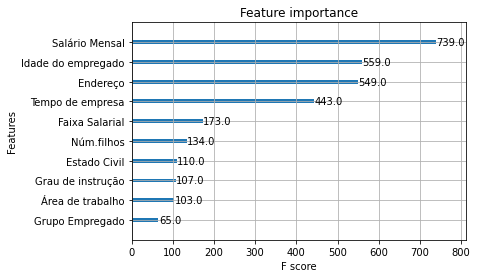

In [258]:
# plot feature importance
plot_importance(final_model)
plt.show()

In [259]:
results = cross_val_score(final_model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'recall')

def intervalo3(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de recall: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo3(results)

Recall médio: 72.75%
Intervalo de recall: [52.97% ~ 92.53%]


In [260]:
results = cross_val_score(final_model, X_train, Y_train, cv = StratifiedKFold(n_splits = 10, shuffle = True), scoring = 'precision')

def intervalo2(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de precisão: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo2(results)

Precisão média: 80.64%
Intervalo de precisão: [66.61% ~ 94.67%]


C:\Users\mvmen\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


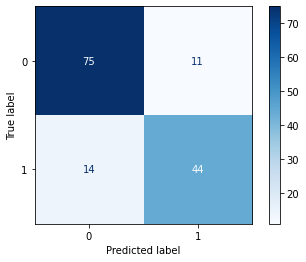

In [261]:
plot_confusion_matrix(final_model, X_test, Y_test, cmap='Blues')